In [6]:
%matplotlib inline
import matplotlib as plt
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime

In [7]:
from IPython.core.display import HTML
css = open("styles/style-table.css").read() + open('styles/style-notebook.css').read() + open("styles/test.css").read()
HTML('<style>{}</style>'.format(css))

<style>body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
h3 {
    color: white;
    background-color: black;
    padding: 0.5em;
}

html {
  font-size: 62.5% !important; }
body {
  font-size: 1.5em !important; /* currently ems cause chrome bug misinterpreting rems on body element */
  line-height: 1.6 !important;
  font-weight: 400 !important;
  font-family: "Raleway", "HelveticaNeue", "Helvetica Neue", Helvetica, Arial, sans-serif !important;
  color: #222 !important; }

div{ border-radius: 0px !important;  }
div.CodeMirror-sizer{ background: rgb(244, 244, 248) !important; }
div.input_area{ background: rgb(244, 244, 248) !important; }

div.out_prompt_overlay:hover{ background: rgb(244, 244, 248) !important; }
div.input_prompt:hover{ background: rgb(244, 244, 248) !important; }

h1, h2, h3, h4, h5, h6 {
  color: #333 !important;
  margin-top: 0 !important;
  margin-bottom: 2rem !important;
  font-weight: 300 !important; }
h1 { font-size: 4.0rem !important; line-height: 1.2 !important;  letter-spacing: -.1rem !important;}
h2 { font-size: 3.6rem !important; line-height: 1.25 !important; letter-spacing: -.1rem !important; }
h3 { font-size: 3.0rem !important; line-height: 1.3 !important;  letter-spacing: -.1rem !important; }
h4 { font-size: 2.4rem !important; line-height: 1.35 !important; letter-spacing: -.08rem !important; }
h5 { font-size: 1.8rem !important; line-height: 1.5 !important;  letter-spacing: -.05rem !important; }
h6 { font-size: 1.5rem !important; line-height: 1.6 !important;  letter-spacing: 0 !important; }

@media (min-width: 550px) {
  h1 { font-size: 5.0rem !important; }
  h2 { font-size: 4.2rem !important; }
  h3 { font-size: 3.6rem !important; }
  h4 { font-size: 3.0rem !important; }
  h5 { font-size: 2.4rem !important; }
  h6 { font-size: 1.5rem !important; }
}

p {
  margin-top: 0 !important; }

a {
  color: #1EAEDB !important; }
a:hover {
  color: #0FA0CE !important; }

code {
  padding: .2rem .5rem !important;
  margin: 0 .2rem !important;
  font-size: 90% !important;
  white-space: nowrap !important;
  background: #F1F1F1 !important;
  border: 1px solid #E1E1E1 !important;
  border-radius: 4px !important; }
pre > code {
  display: block !important;
  padding: 1rem 1.5rem !important;
  white-space: pre !important; }

button{ border-radius: 0px !important; }
.navbar-inner{ background-image: none !important;  }
select, textarea{ border-radius: 0px !important; }
</style>

In [3]:
sources = pd.read_csv("/Users/coreypetty/PycharmProjects/TBP_metrics/raw_data/user-agents_2016-04-17.csv")
sources = sources.sort_values(by='total_downloads', ascending=False)
sources = sources.set_index('user_agent')
sources.head()

,total_downloads
user_agent,
Chrome,6239
AppleCoreMedia,3771
Mozilla,3393
Overcast,2736
Pocket Casts,1276


In [4]:
summed = sum(sources.total_downloads)
sources['percentage'] = sources.total_downloads / summed * 100
sources.head()

,total_downloads,percentage
user_agent,,
Chrome,6239,23.904215
AppleCoreMedia,3771,14.448276
Mozilla,3393,13.000000
Overcast,2736,10.482759
Pocket Casts,1276,4.888889


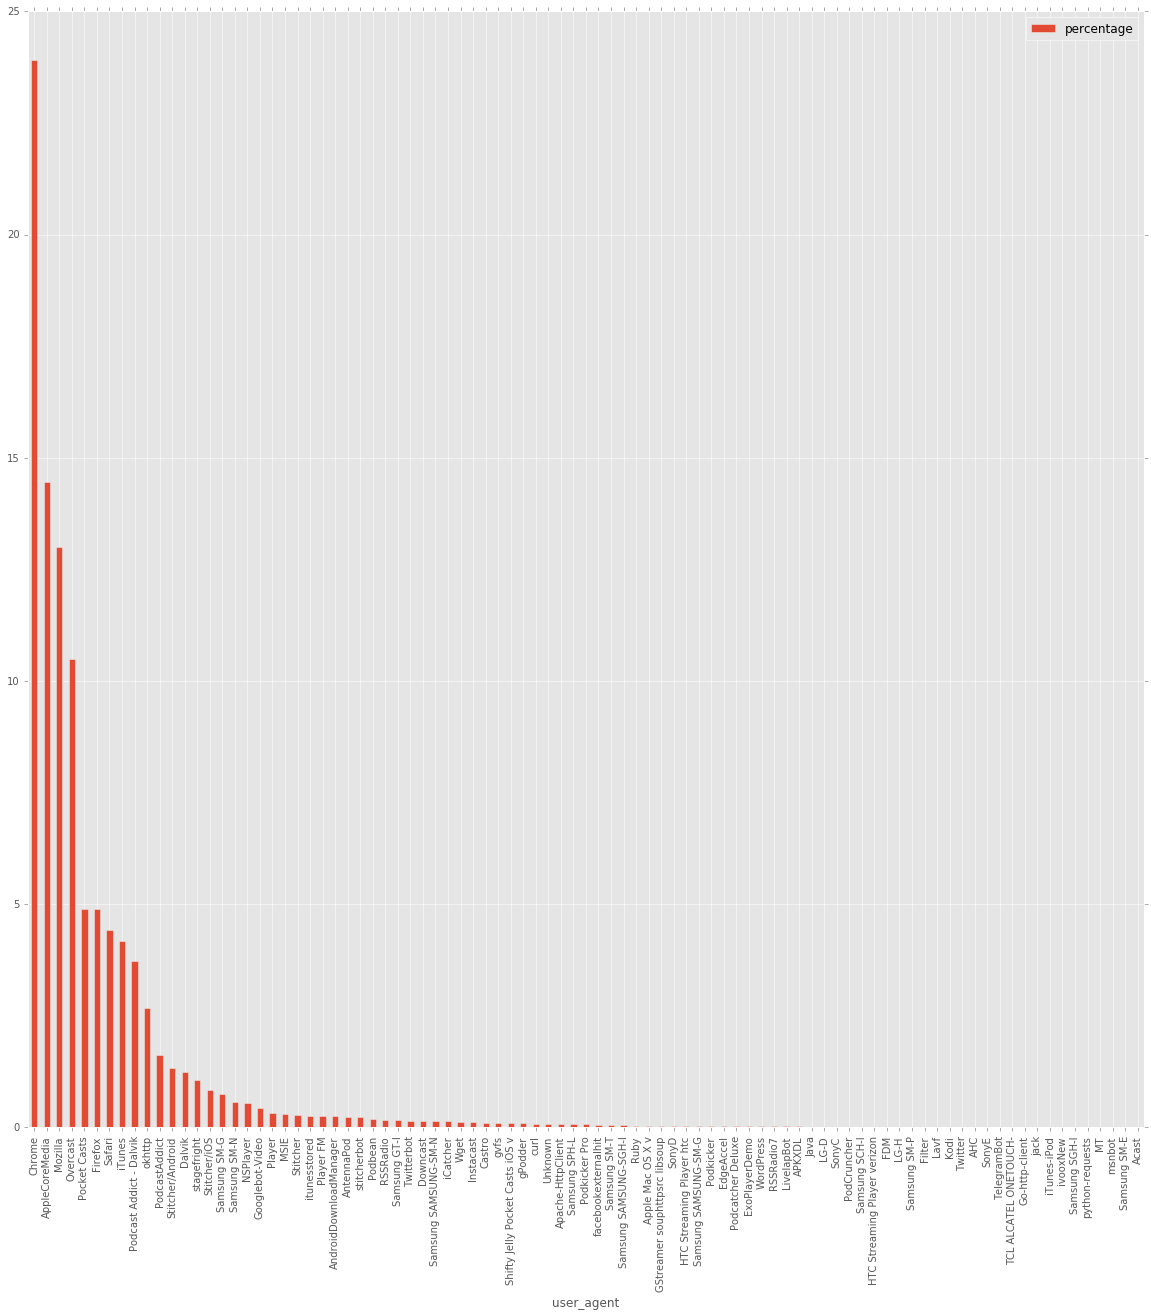

In [5]:
plot = sources.plot(y='percentage', kind='Bar', figsize=(20,20))